## Mobile Price Prediction 

### In this project we are going to do perdict the house price based on some of the feature.Ok let's get start the prediction!!!

### Import the Libraires and Dataset

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Import Dataset
df = pd.read_csv("data.csv")
df.head()

,Unnamed: 0,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,1,I Kall K11,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,2,Nokia 105 ss,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.18,35,15.0,3800,18999


### Data Preprocessing

In [3]:
# Drop the Unwannted column the first one
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
# After removing the dataset look like
df.head()

,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,I Kall K11,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,Nokia 105 ss,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.18,35,15.0,3800,18999


In [5]:
# Checking null values into the dataset
df.isnull().sum()

Brand me           0
Ratings           31
RAM                7
ROM                4
Mobile_Size        2
Primary_Cam        0
Selfi_Cam        269
Battery_Power      0
Price              0
dtype: int64

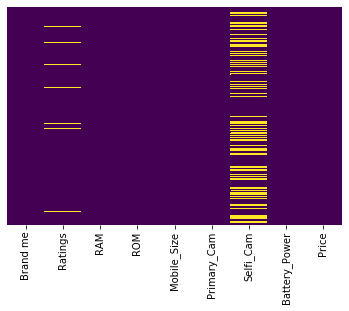

In [6]:
# Seeing the null values using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 9 columns):
Brand me         836 non-null object
Ratings          805 non-null float64
RAM              829 non-null float64
ROM              832 non-null float64
Mobile_Size      834 non-null float64
Primary_Cam      836 non-null int64
Selfi_Cam        567 non-null float64
Battery_Power    836 non-null int64
Price            836 non-null int64
dtypes: float64(5), int64(3), object(1)
memory usage: 58.9+ KB


In [8]:
df.dtypes

Brand me          object
Ratings          float64
RAM              float64
ROM              float64
Mobile_Size      float64
Primary_Cam        int64
Selfi_Cam        float64
Battery_Power      int64
Price              int64
dtype: object

In [9]:
# Describe
df.describe()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
count,805.000000,829.000000,832.000000,834.000000,836.000000,567.000000,836.000000,836.00000
mean,4.103106,6.066345,64.373077,5.597282,47.983254,9.784832,3274.688995,18220.34689
std,0.365356,2.530336,53.447825,3.898664,11.170093,6.503838,927.518852,52805.55022
min,2.800000,0.000000,0.000000,2.000000,5.000000,0.000000,1020.000000,479.00000
25%,3.800000,6.000000,32.000000,4.500000,48.000000,5.000000,3000.000000,984.75000
50%,4.100000,6.000000,40.000000,4.770000,48.000000,8.000000,3000.000000,1697.00000
75%,4.400000,6.000000,64.000000,6.300000,48.000000,13.000000,3800.000000,18999.00000
max,4.800000,34.000000,256.000000,44.000000,64.000000,61.000000,6000.000000,573000.00000


In [10]:
# Dropping the Name columns
df.drop(['Brand me'],axis=1,inplace=True)

### Handling Missing Values

In [11]:
# We should handling these null or missing values
df.isnull().sum()

Ratings           31
RAM                7
ROM                4
Mobile_Size        2
Primary_Cam        0
Selfi_Cam        269
Battery_Power      0
Price              0
dtype: int64

In [12]:
# Fill up the mean values of all the missing value columns into the dataset
df['Ratings'] = df['Ratings'].fillna(df['Ratings'].mean())
df['RAM'] = df['RAM'].fillna(df['RAM'].mean())
df['ROM'] = df['ROM'].fillna(df['ROM'].mean())
df['Mobile_Size'] = df['Mobile_Size'].fillna(df['Mobile_Size'].mean())
df['Selfi_Cam'] = df['Selfi_Cam'].fillna(df['Selfi_Cam'].mean())

In [13]:
# After handling the all of the missing and null values from the dataset
df.isnull().sum()

Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
dtype: int64

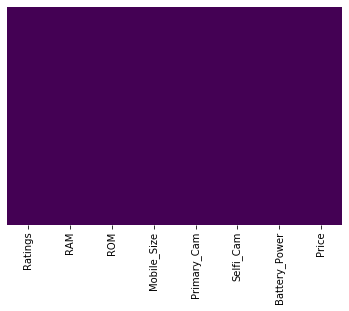

In [14]:
# We can able to see the there is no null values  
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
# Changing the Datatype
df['RAM'] = df['RAM'].astype('int64')
df['ROM'] = df['ROM'].astype('int64')
df['Selfi_Cam'] = df['Selfi_Cam'].astype('int64')

In [16]:
# Final dataset for build a model
df.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4,128,6.00,48,13,4000,24999
1,3.4,6,64,4.50,48,12,4000,15999
2,4.3,4,4,4.50,64,16,4000,15000
3,4.4,6,64,6.40,48,15,3800,18999
4,4.5,6,128,6.18,35,15,3800,18999


### Exploratory Data Analysis 

In [17]:
# Columns

#### Let's Understand about the Features

- **1. Brand me** This is first feature of our dataset. It's Denotes name of the mobile phones and   Brands.</br>
- **2.Ratings** This Feature Denotes Number of the ratings gave by the consumers for each mobile.</br>
- **3.RAM** It's have RAM size of the phone. </br>
- **4.ROM** It's have ROM **(Internal Memory)** size of the phone. </br>
- **5.Mobile_Size** It's represents how many inches of the particular mobile phone have. Here all the values are gave in **inches** </br>
- **6.Primary_Cam** It's Denotes Number of the pixels of the primary camera **(Back Camera)** for each mobiles.</br>
- **7.Selfi_Cam** It's Denotes Number of the pixels of the Selfi camera **(Front Camera)** for each mobiles.</br>
- **8.Battery_Power** It's Denotes amount of the battery power in each mobiles in **mAh**.</br>
- **9.Price** It's a Dependent Feature of the dataset. It's just denote prices of the each mobiles.


In [18]:
# Finding out the correlation between the features
corr = df.corr()
corr.shape

(8, 8)

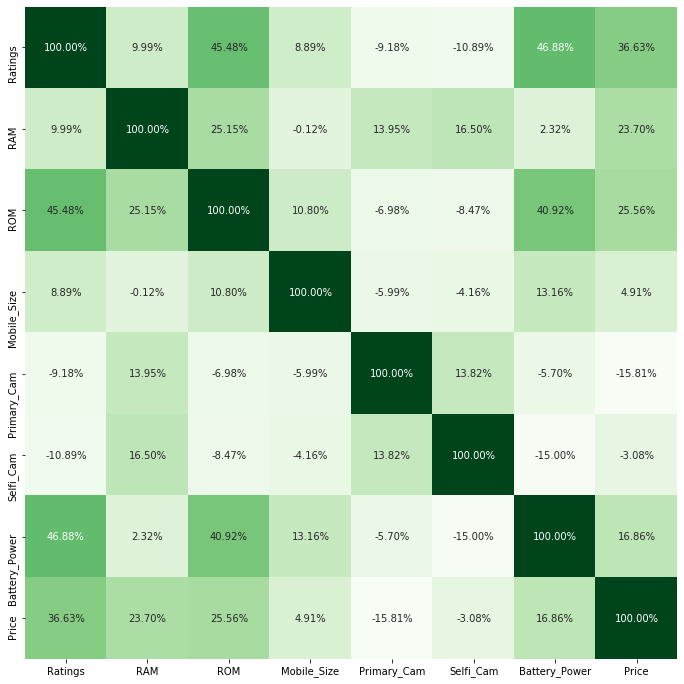

In [19]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar=False, square= True, fmt='.2%', annot=True, cmap='Greens')

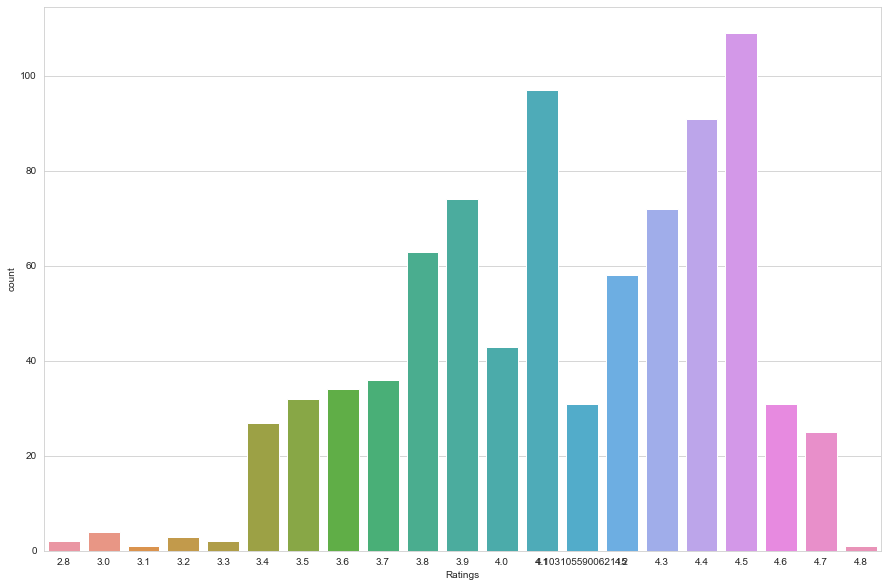

In [20]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='Ratings',data=df)

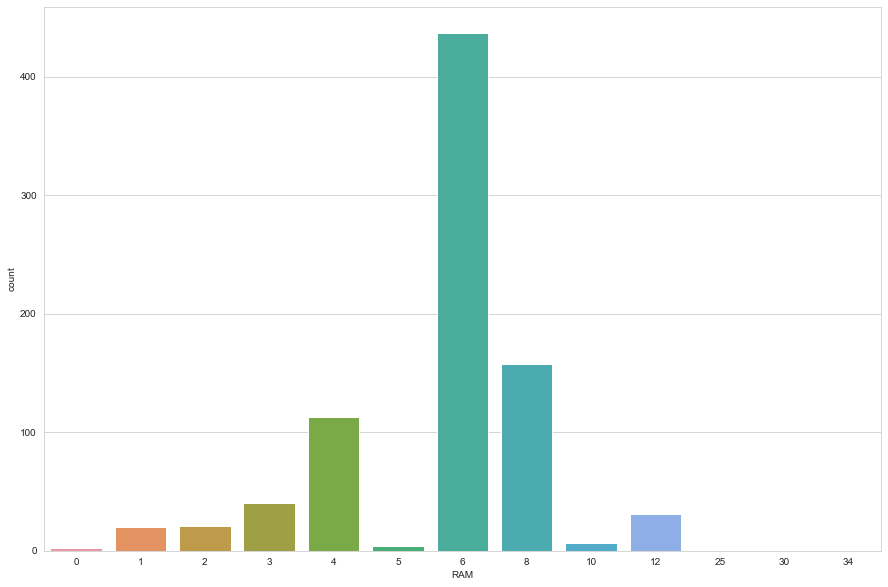

In [21]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='RAM',data=df)

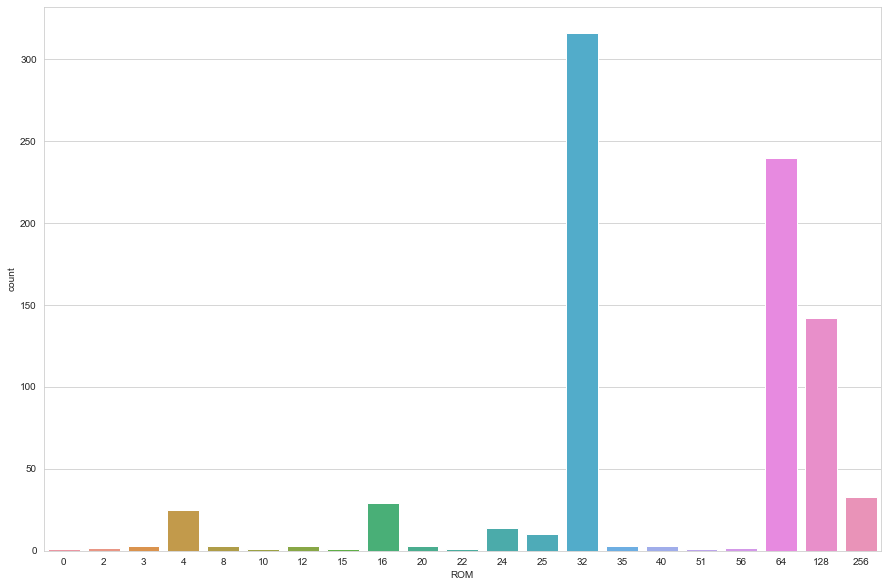

In [22]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='ROM',data=df)

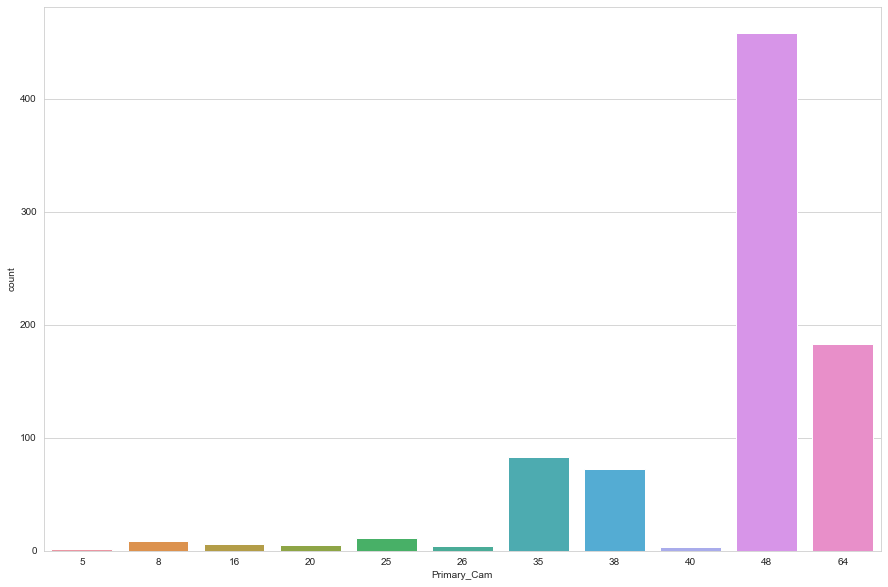

In [23]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='Primary_Cam',data=df)

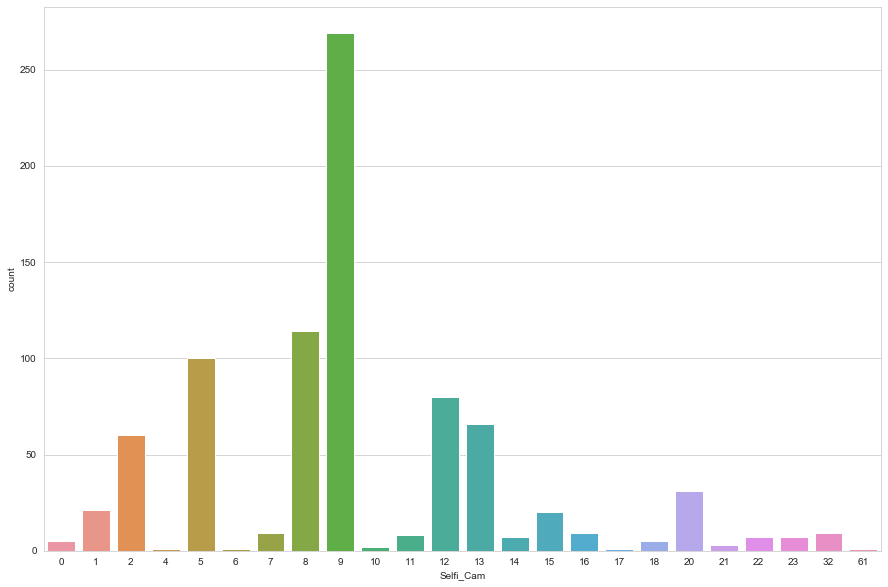

In [24]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='Selfi_Cam',data=df)

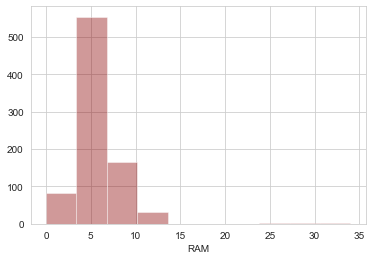

In [63]:
sns.distplot(df['RAM'].dropna(),kde=False,color='darkred',bins=10)

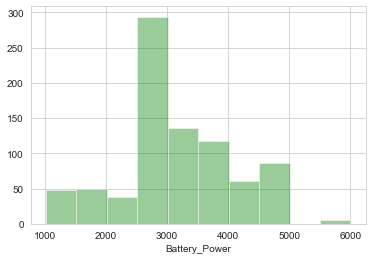

In [62]:
sns.distplot(df['Battery_Power'].dropna(),kde=False,color='green',bins=10)

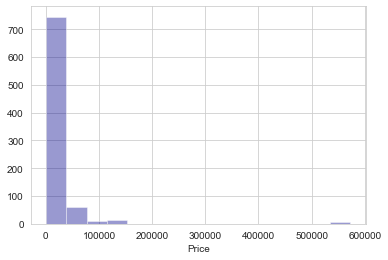

In [64]:
sns.distplot(df['Price'].dropna(),kde=False,color='darkblue',bins=15)

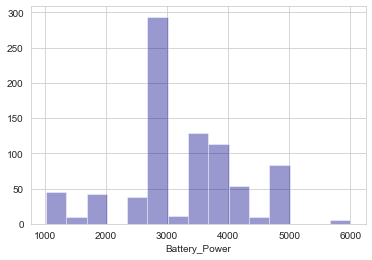

In [65]:
sns.distplot(df['Battery_Power'].dropna(),kde=False,color='darkblue',bins=15)

<Figure size 720x720 with 0 Axes>

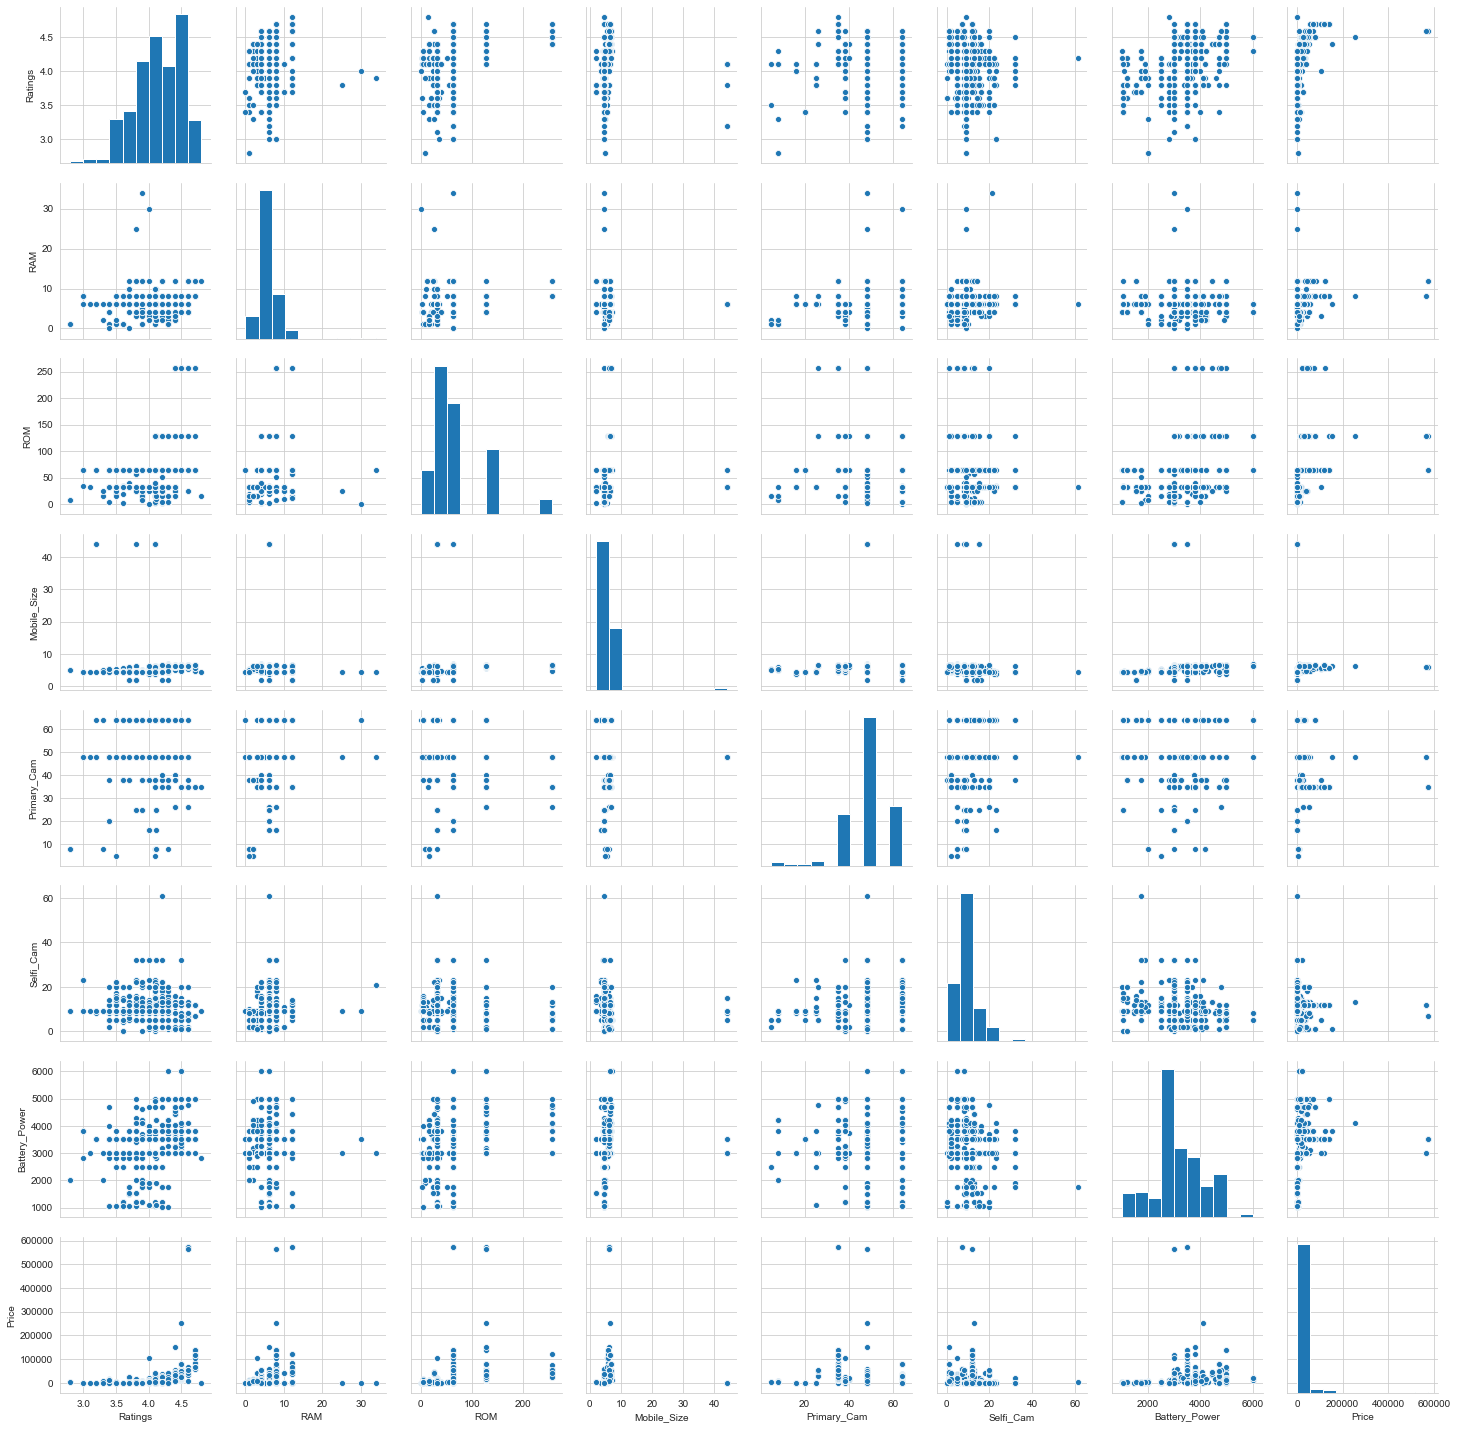

In [71]:
plt.figure(figsize=(10,10))
sns.pairplot(data=df)

## Feature Selection

In [25]:
# Lets try to understand which are important feature for this dataset
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [26]:
X = df.iloc[:,1:7]  # Independent columns
y = df.iloc[:,[-1]] # Yarget column i.e price range 

In [27]:
# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)

In [28]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [29]:
# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [30]:
featureScores

,Specs,Score
0,RAM,605.009453
1,ROM,31222.209834
2,Mobile_Size,874.471349
3,Primary_Cam,1465.379223
4,Selfi_Cam,1358.898574
5,Battery_Power,156629.116310


In [31]:
print(featureScores.nlargest(4,'Score'))  #print 5 best features

           Specs          Score
5  Battery_Power  156629.116310
1            ROM   31222.209834
3    Primary_Cam    1465.379223
4      Selfi_Cam    1358.898574


### Feature Importance

In [32]:
# Fiting Feature Seclection using Ensemble Methods
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [33]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.12253721 0.109504   0.26739755 0.09270551 0.20932722 0.19852852]


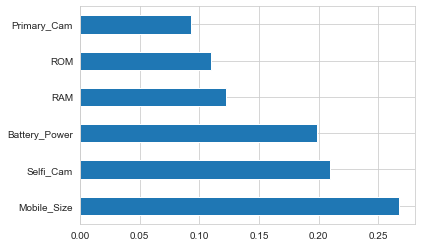

In [34]:
# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [72]:
df.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4,128,6.00,48,13,4000,24999
1,3.4,6,64,4.50,48,12,4000,15999
2,4.3,4,4,4.50,64,16,4000,15000
3,4.4,6,64,6.40,48,15,3800,18999
4,4.5,6,128,6.18,35,15,3800,18999


## Model Fitting 

### Random Forest Regressor 

In [36]:
# Value Assigning
X = df.iloc[:,[6,2,4,5,1,3]]
y = df.iloc[:,[-1]]

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [38]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [39]:
y_pred = reg.predict(X_train)

In [40]:
# Training Score
print("Training Accuracy:",reg.score(X_train,y_train)*100)

Training Accuracy: 96.2779244902184


In [41]:
# Testing Score
print("Testing Accuracy:",reg.score(X_test,y_test)*100)

Testing Accuracy: 95.33388099982595


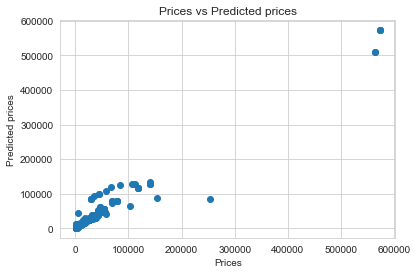

In [73]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [42]:
# Sample Prediction
reg.predict([[4.0,128.0,6.00,48,13.0,4000]])

array([318251.7])

### Support Vector Regressor

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [44]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [45]:
y_pred = reg.predict(X_train)

In [46]:
# Training Score
print("Training Accuracy:",reg.score(X_train,y_train)*100)

Training Accuracy: 96.2779244902184


In [47]:
# Testing Score
print("Testing Accuracy:",reg.score(X_test,y_test)*100)

Testing Accuracy: 95.33388099982595


In [48]:
# Sample Prediction
reg.predict([[4.0,128.0,6.00,48,13.0,4000]])


array([318251.7])

### Finally We Made it!!!

#### Random Forest Regressor

- **Tarining Accuracy:** 96.2% Accuracy <br/>
- **Testing Accuracy:** 95.3% Accuracy

####  Support Vector Regressor

- **Tarining Accuracy:** 96.2% Accuracy <br/>
- **Testing Accuracy:** 95.8% Accuracy
